# Exploratory Data Analysis (EDA) - Nykaa Cosmetics Product Reviews

This notebook performs comprehensive exploratory data analysis including:
- Basic statistics and overview
- Rating analysis
- Brand analysis
- Price analysis
- Temporal trends
- Text analysis
- Correlation analysis
- Word cloud generation

## Import Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## Load Data

In [30]:
# Load cleaned data
df = pd.read_csv('cleaned_data.csv')

# Convert date column
if 'review_date' in df.columns:
    df['review_date'] = pd.to_datetime(df['review_date'])

print(f"Data loaded: {df.shape}")
df.head()

Data loaded: (61284, 18)


,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...


## 1. Basic Statistics

In [31]:
print("="*60)
print("DATASET OVERVIEW")
print("="*60)

print(f"\nTotal Reviews: {len(df):,}")
print(f"Total Products: {df['product_id'].nunique():,}")
print(f"Total Brands: {df['brand_name'].nunique():,}")
print(f"Total Reviewers: {df['author'].nunique():,}")

DATASET OVERVIEW

Total Reviews: 61,284
Total Products: 295
Total Brands: 11
Total Reviewers: 41,526


In [32]:
# Summary statistics for numeric columns
df.describe()

,product_id,review_id,review_date,review_rating,mrp,price,product_rating,product_rating_count
count,6.128400e+04,6.128400e+04,61284,61283.000000,61284.000000,61284.000000,61284.000000,61284.000000
mean,7.983802e+05,1.484995e+07,2020-08-22 20:00:04.072498432,4.414781,573.260247,462.129512,4.099130,7582.963840
min,2.500000e+02,9.600000e+01,2013-05-20 16:48:56,1.000000,75.000000,45.000000,1.500000,1.000000
25%,1.604880e+05,1.102373e+07,2019-10-23 01:55:38.500000,4.000000,300.000000,262.000000,4.000000,1760.000000
50%,4.524430e+05,1.525142e+07,2020-10-20 13:07:14.500000,5.000000,599.000000,400.000000,4.100000,3925.000000
75%,7.665290e+05,2.002927e+07,2021-08-14 19:37:17.500000,5.000000,799.000000,639.000000,4.300000,8720.000000
max,7.749427e+06,2.963031e+07,2022-10-22 18:12:27,5.000000,3874.000000,2947.000000,4.800000,98477.000000
std,1.281418e+06,7.383506e+06,NaN,1.062547,324.098930,264.876964,0.235945,14463.246136


In [33]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   product_id            61284 non-null  int64         
 1   brand_name            61284 non-null  object        
 2   review_id             61284 non-null  int64         
 3   review_title          61284 non-null  object        
 4   review_text           61275 non-null  object        
 5   author                61284 non-null  object        
 6   review_date           61284 non-null  datetime64[ns]
 7   review_rating         61283 non-null  float64       
 8   is_a_buyer            61284 non-null  bool          
 9   pro_user              61284 non-null  bool          
 10  review_label          48249 non-null  object        
 11  product_title         61284 non-null  object        
 12  mrp                   61284 non-null  int64         
 13  price           

## 2. Rating Analysis

In [34]:
# Review rating statistics
if 'review_rating' in df.columns:
    print("Review Rating Distribution:")
    print(df['review_rating'].value_counts().sort_index())
    print(f"\nMean Review Rating: {df['review_rating'].mean():.2f}")
    print(f"Median Review Rating: {df['review_rating'].median():.2f}")
    print(f"Mode Review Rating: {df['review_rating'].mode()[0]:.1f}")

Review Rating Distribution:
review_rating
1.0     3077
2.0     1718
3.0     3540
4.0    11322
5.0    41626
Name: count, dtype: int64

Mean Review Rating: 4.41
Median Review Rating: 5.00
Mode Review Rating: 5.0


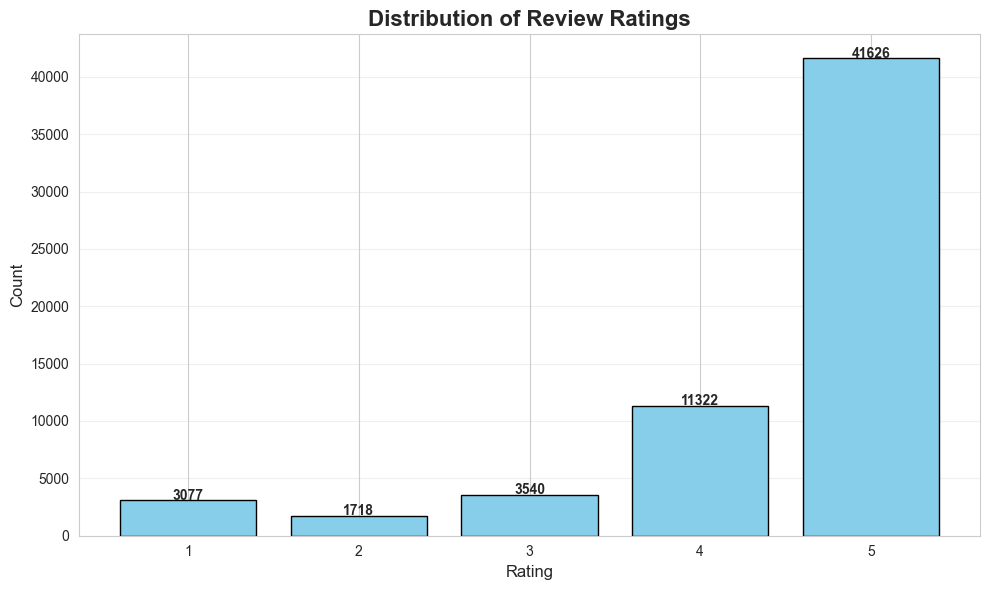

Saved: review_rating_distribution.png


In [35]:
# Plot review rating distribution
if 'review_rating' in df.columns:
    plt.figure(figsize=(10, 6))
    rating_counts = df['review_rating'].value_counts().sort_index()
    
    plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')
    plt.title('Distribution of Review Ratings', fontsize=16, fontweight='bold')
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rating_counts.index)
    plt.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(rating_counts.values):
        plt.text(rating_counts.index[i], v + 50, str(v), ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('review_rating_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Saved: review_rating_distribution.png")

In [36]:
# Product rating statistics
if 'product_rating' in df.columns:
    print("\nProduct Rating Statistics:")
    print(f"Mean Product Rating: {df['product_rating'].mean():.2f}")
    print(f"Median Product Rating: {df['product_rating'].median():.2f}")
    print(f"Min Product Rating: {df['product_rating'].min():.2f}")
    print(f"Max Product Rating: {df['product_rating'].max():.2f}")


Product Rating Statistics:
Mean Product Rating: 4.10
Median Product Rating: 4.10
Min Product Rating: 1.50
Max Product Rating: 4.80


## 3. Brand Analysis

In [37]:
# Top brands by review count
if 'brand_name' in df.columns:
    print("Top 10 Brands by Review Count:")
    top_brands = df['brand_name'].value_counts().head(10)
    print(top_brands)

Top 10 Brands by Review Count:
brand_name
Nykaa Cosmetics            17652
Kay Beauty                 13788
Lakme                       6999
Maybelline New York         6821
Herbal Essences             6197
L'Oreal Paris               4273
NYX Professional Makeup     2954
Nykaa Naturals              1426
Nivea                        774
Olay                         399
Name: count, dtype: int64


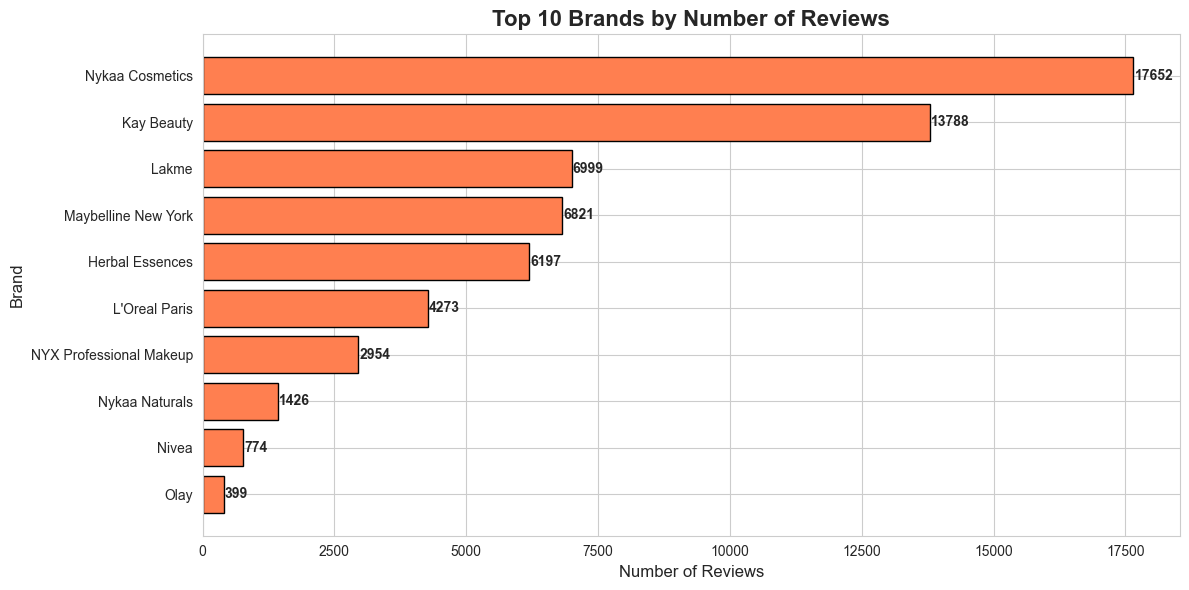

Saved: top_brands.png


In [38]:
# Plot top brands
if 'brand_name' in df.columns:
    plt.figure(figsize=(12, 6))
    top_brands = df['brand_name'].value_counts().head(10)
    
    plt.barh(range(len(top_brands)), top_brands.values, color='coral', edgecolor='black')
    plt.yticks(range(len(top_brands)), top_brands.index)
    plt.xlabel('Number of Reviews', fontsize=12)
    plt.ylabel('Brand', fontsize=12)
    plt.title('Top 10 Brands by Number of Reviews', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add value labels
    for i, v in enumerate(top_brands.values):
        plt.text(v + 20, i, str(v), va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('top_brands.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Saved: top_brands.png")

In [39]:
# Average rating by brand (brands with at least 10 reviews)
if 'brand_name' in df.columns and 'review_rating' in df.columns:
    print("\nTop 10 Brands by Average Rating (min 10 reviews):")
    brand_ratings = df.groupby('brand_name')['review_rating'].agg(['mean', 'count'])
    brand_ratings = brand_ratings[brand_ratings['count'] >= 10]
    top_rated = brand_ratings.sort_values('mean', ascending=False).head(10)
    print(top_rated)


Top 10 Brands by Average Rating (min 10 reviews):
                             mean  count
brand_name                              
Kay Beauty               4.701189  13788
Nykaa Cosmetics          4.463460  17652
Herbal Essences          4.329030   6197
Maybelline New York      4.277819   6821
Lakme                    4.276754   6999
NYX Professional Makeup  4.268879   2953
L'Oreal Paris            4.188626   4273
Nykaa Naturals           4.131136   1426
Nivea                    3.974160    774
Olay                     3.834586    399


## 4. Price Analysis

In [40]:
# Calculate discount features
if 'price' in df.columns and 'mrp' in df.columns:
    df['discount'] = df['mrp'] - df['price']
    df['discount_pct'] = ((df['mrp'] - df['price']) / df['mrp'] * 100)
    
    print("Price Statistics:")
    print(f"Average MRP: ₹{df['mrp'].mean():.2f}")
    print(f"Average Price: ₹{df['price'].mean():.2f}")
    print(f"Average Discount: ₹{df['discount'].mean():.2f}")
    print(f"Average Discount %: {df['discount_pct'].mean():.2f}%")
    print(f"\nMax Price: ₹{df['price'].max():.2f}")
    print(f"Min Price: ₹{df['price'].min():.2f}")

Price Statistics:
Average MRP: ₹573.26
Average Price: ₹462.13
Average Discount: ₹111.13
Average Discount %: 17.66%

Max Price: ₹2947.00
Min Price: ₹45.00


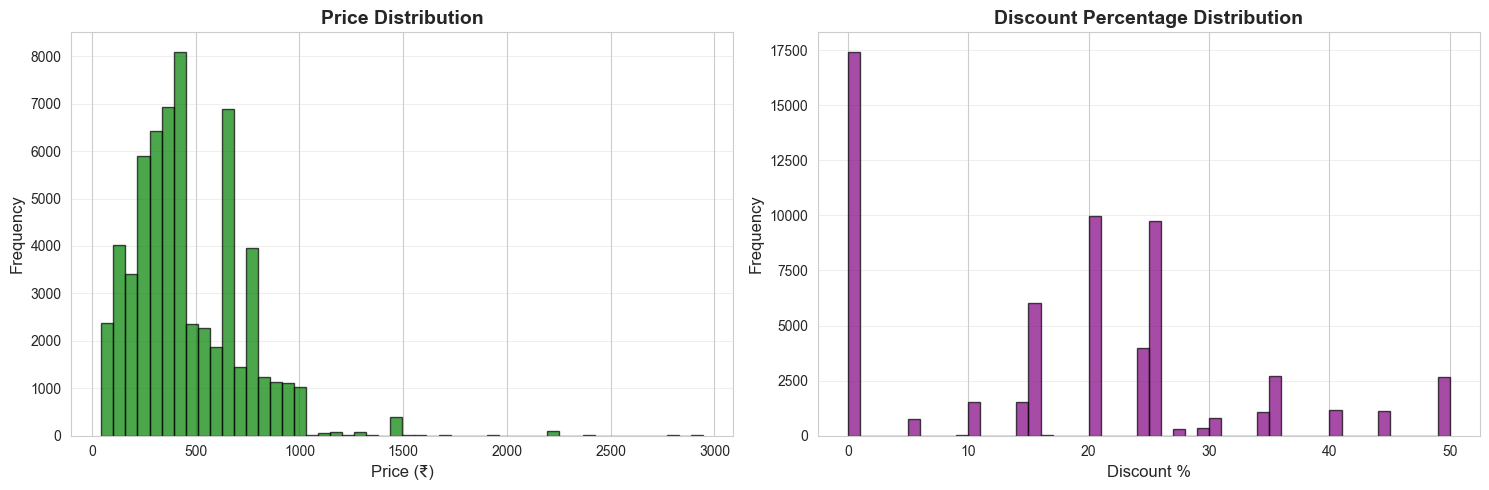

Saved: price_analysis.png


In [41]:
# Price distribution plots
if 'price' in df.columns and 'discount_pct' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Price distribution
    axes[0].hist(df['price'].dropna(), bins=50, color='green', alpha=0.7, edgecolor='black')
    axes[0].set_title('Price Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Price (₹)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Discount percentage distribution
    axes[1].hist(df['discount_pct'].dropna(), bins=50, color='purple', alpha=0.7, edgecolor='black')
    axes[1].set_title('Discount Percentage Distribution', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Discount %', fontsize=12)
    axes[1].set_ylabel('Frequency', fontsize=12)
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('price_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Saved: price_analysis.png")

## 5. Temporal Analysis

In [42]:
# Reviews by year
if 'review_date' in df.columns:
    df['year'] = df['review_date'].dt.year
    df['month'] = df['review_date'].dt.month
    df['year_month'] = df['review_date'].dt.to_period('M')
    
    print("Reviews by Year:")
    print(df['year'].value_counts().sort_index())

Reviews by Year:
year
2013        2
2014       53
2015      266
2016      556
2017     1683
2018     4210
2019    11365
2020    16605
2021    16723
2022     9821
Name: count, dtype: int64


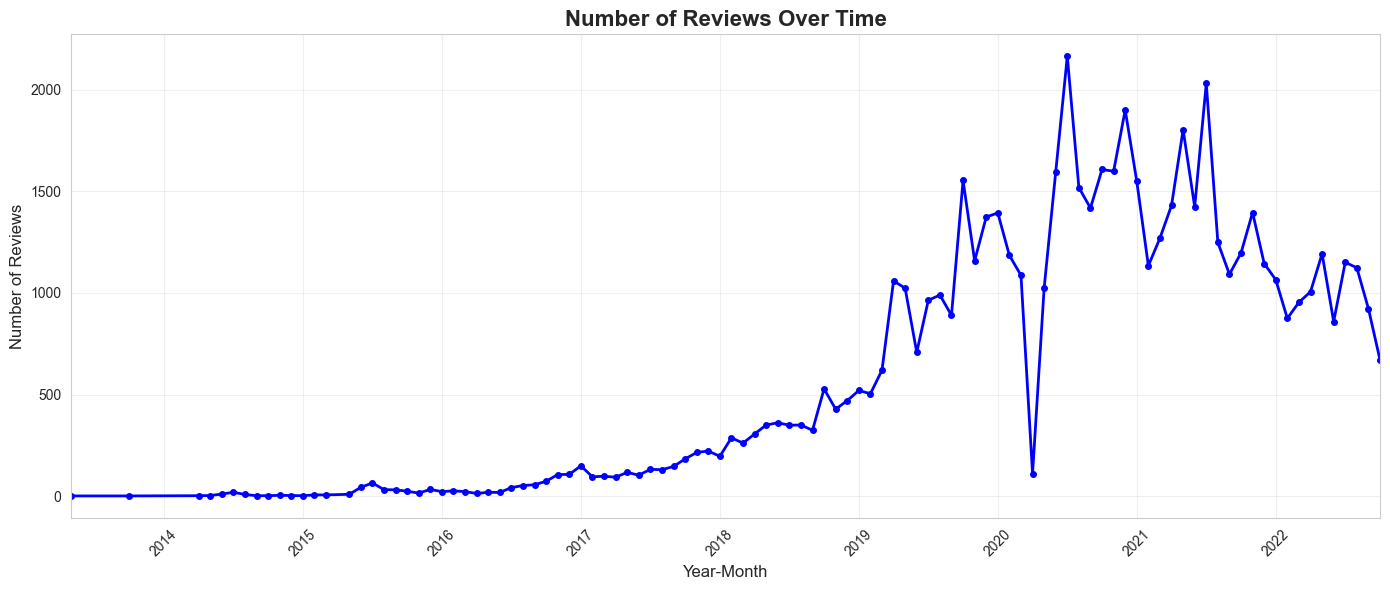

Saved: reviews_over_time.png


In [43]:
# Reviews over time
if 'year_month' in df.columns:
    reviews_over_time = df.groupby('year_month').size()
    
    plt.figure(figsize=(14, 6))
    reviews_over_time.plot(kind='line', marker='o', color='blue', linewidth=2, markersize=4)
    plt.title('Number of Reviews Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Year-Month', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('reviews_over_time.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Saved: reviews_over_time.png")

## 6. Text Analysis

In [44]:
# Text length features
if 'review_text' in df.columns:
    df['text_length'] = df['review_text'].astype(str).str.len()
    df['word_count'] = df['review_text'].astype(str).str.split().str.len()
    
    print("Text Statistics:")
    print(f"Average Review Length: {df['text_length'].mean():.2f} characters")
    print(f"Average Word Count: {df['word_count'].mean():.2f} words")
    print(f"Max Word Count: {df['word_count'].max():.0f} words")
    print(f"Min Word Count: {df['word_count'].min():.0f} words")

Text Statistics:
Average Review Length: 116.32 characters
Average Word Count: 21.61 words
Max Word Count: 437 words
Min Word Count: 1 words


In [45]:
# Average word count by rating
if 'word_count' in df.columns and 'review_rating' in df.columns:
    print("\nAverage Word Count by Rating:")
    print(df.groupby('review_rating')['word_count'].mean().round(2))


Average Word Count by Rating:
review_rating
1.0    24.01
2.0    26.30
3.0    24.88
4.0    22.57
5.0    20.70
Name: word_count, dtype: float64


<Figure size 1000x600 with 0 Axes>

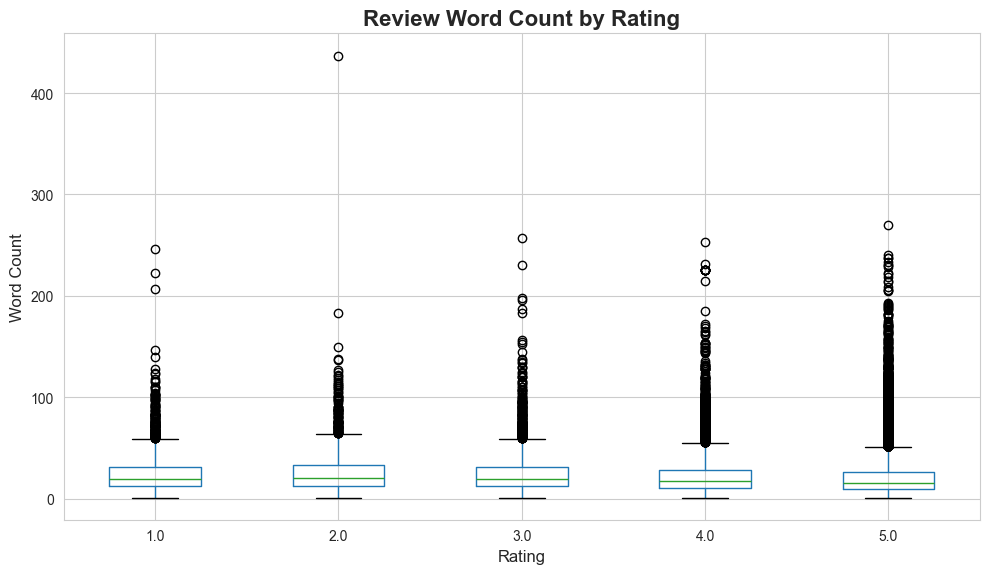

Saved: wordcount_by_rating.png


In [46]:
# Box plot of word count by rating
if 'word_count' in df.columns and 'review_rating' in df.columns:
    plt.figure(figsize=(10, 6))
    df.boxplot(column='word_count', by='review_rating', figsize=(10, 6))
    plt.title('Review Word Count by Rating', fontsize=16, fontweight='bold')
    plt.suptitle('')
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Word Count', fontsize=12)
    plt.tight_layout()
    plt.savefig('wordcount_by_rating.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Saved: wordcount_by_rating.png")

## 7. Buyer Status Analysis

In [47]:
# Verified buyer distribution
if 'is_a_buyer' in df.columns:
    print("Verified Buyer Distribution:")
    print(df['is_a_buyer'].value_counts())
    print(f"\nPercentage of Verified Buyers: {(df['is_a_buyer'].sum() / len(df) * 100):.2f}%")

Verified Buyer Distribution:
is_a_buyer
True     48222
False    13062
Name: count, dtype: int64

Percentage of Verified Buyers: 78.69%


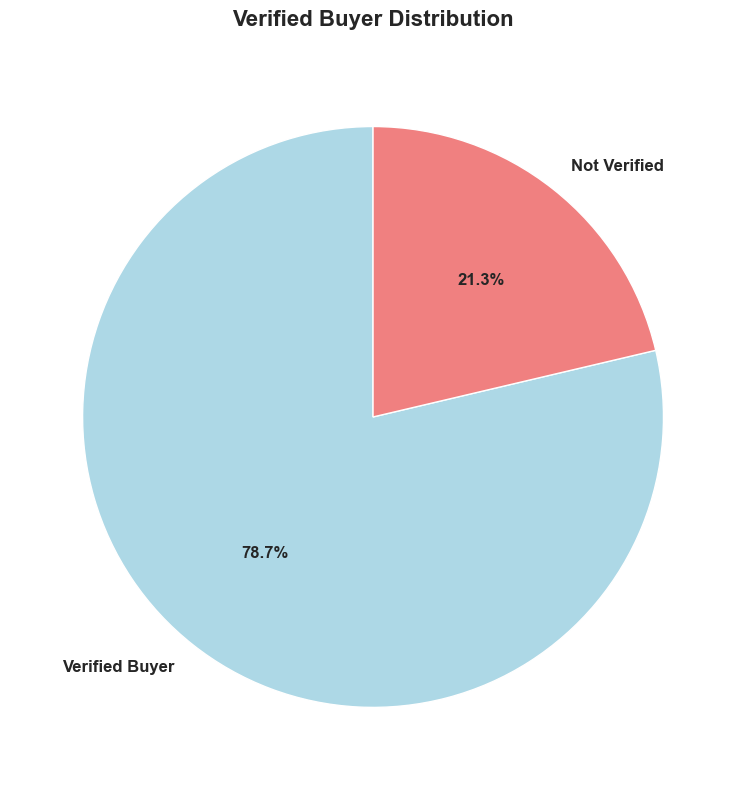

Saved: verified_buyer_distribution.png


In [48]:
# Pie chart of buyer status
if 'is_a_buyer' in df.columns:
    plt.figure(figsize=(8, 8))
    buyer_counts = df['is_a_buyer'].value_counts()
    
    plt.pie(buyer_counts.values, labels=['Verified Buyer', 'Not Verified'], 
            autopct='%1.1f%%', colors=['lightblue', 'lightcoral'],
            startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
    plt.title('Verified Buyer Distribution', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('verified_buyer_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Saved: verified_buyer_distribution.png")

In [49]:
# Average rating by buyer status
if 'is_a_buyer' in df.columns and 'review_rating' in df.columns:
    print("\nAverage Rating by Buyer Status:")
    print(df.groupby('is_a_buyer')['review_rating'].mean())


Average Rating by Buyer Status:
is_a_buyer
False    4.355382
True     4.430870
Name: review_rating, dtype: float64


## 8. Correlation Analysis

In [50]:
# Select numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in ['product_id', 'review_id']]

print(f"Analyzing correlations for {len(numeric_cols)} numeric columns")
print(f"Columns: {list(numeric_cols)}")

Analyzing correlations for 11 numeric columns
Columns: ['review_rating', 'mrp', 'price', 'product_rating', 'product_rating_count', 'discount', 'discount_pct', 'year', 'month', 'text_length', 'word_count']


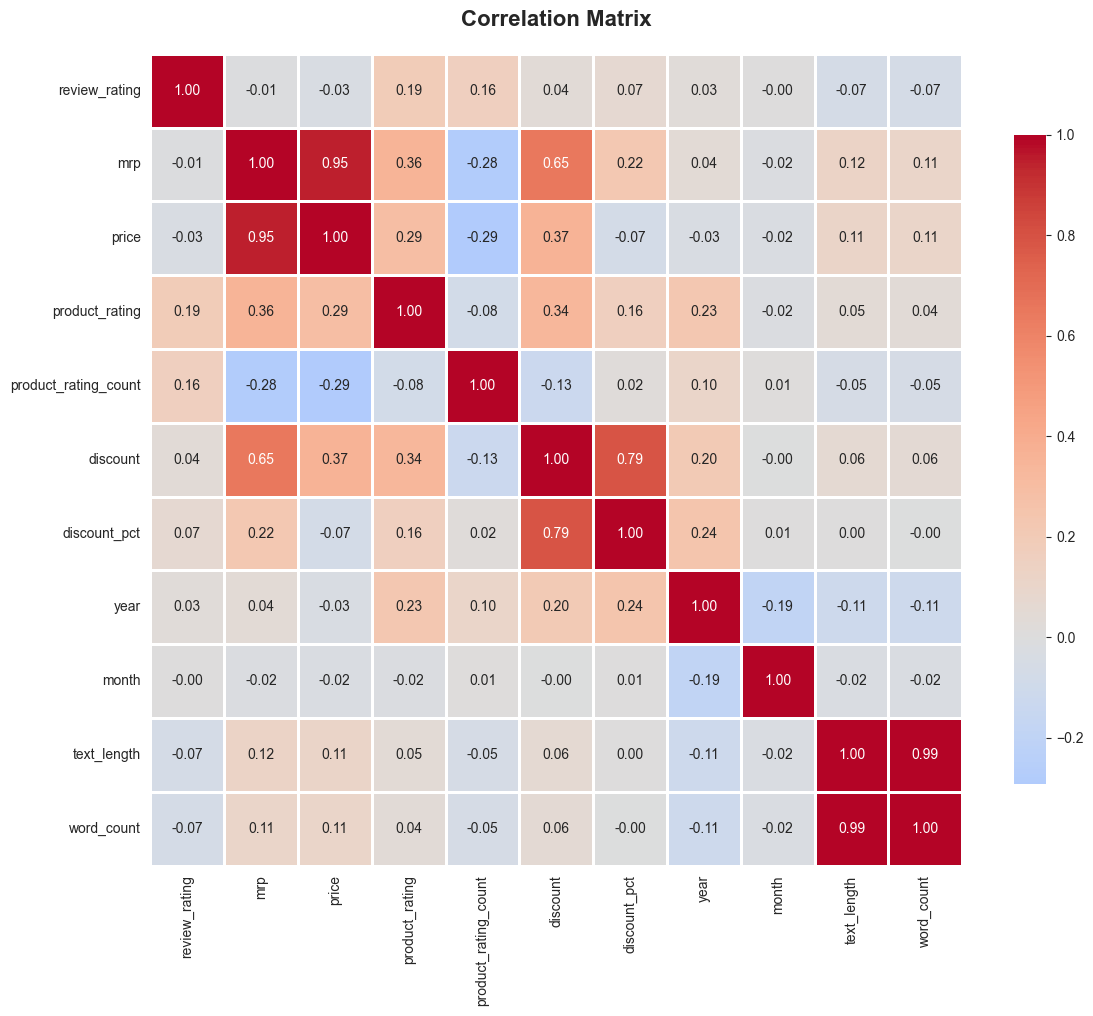

Saved: correlation_matrix.png


In [51]:
# Correlation matrix
if len(numeric_cols) > 1:
    correlation_matrix = df[numeric_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Saved: correlation_matrix.png")

In [52]:
# Strong correlations
if len(numeric_cols) > 1:
    print("\nStrong Correlations (|r| > 0.5):")
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.5:
                strong_corr.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': correlation_matrix.iloc[i, j]
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr)
        print(strong_corr_df.sort_values('Correlation', ascending=False))
    else:
        print("No strong correlations found")


Strong Correlations (|r| > 0.5):
    Variable 1    Variable 2  Correlation
3  text_length    word_count     0.993389
0          mrp         price     0.945777
2     discount  discount_pct     0.791939
1          mrp      discount     0.649970


## 9. Word Cloud

Generating word cloud...


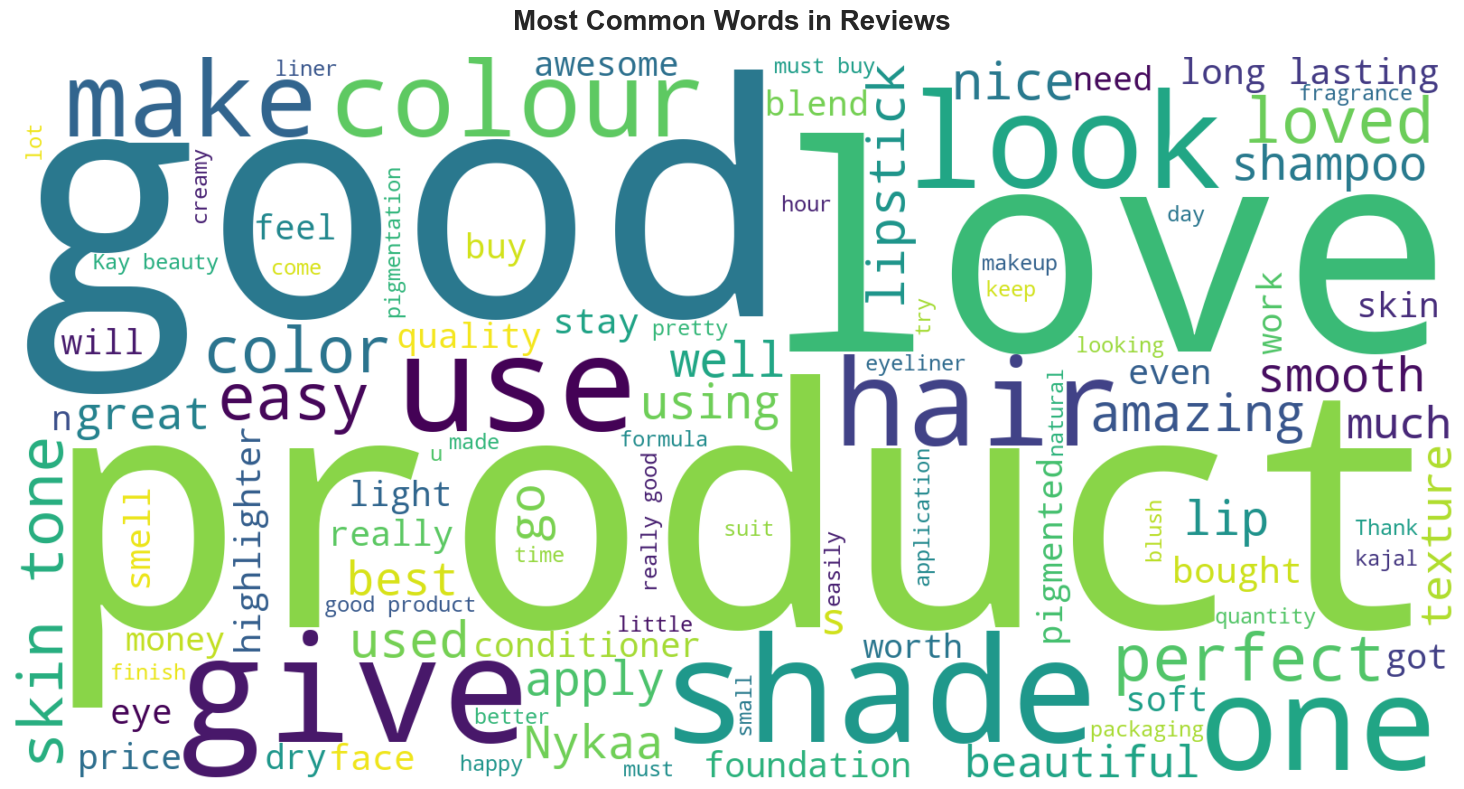

Saved: wordcloud.png


In [53]:
# Generate word cloud from review text
if 'review_text' in df.columns:
    print("Generating word cloud...")
    
    # Combine all review texts
    text = ' '.join(df['review_text'].dropna().astype(str))
    
    # Generate word cloud
    wordcloud = WordCloud(width=1600, height=800, background_color='white',
                         colormap='viridis', max_words=100).generate(text)
    
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Words in Reviews', fontsize=20, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Saved: wordcloud.png")

## 10. Additional Insights

In [54]:
# Most reviewed products
if 'product_title' in df.columns:
    print("Top 10 Most Reviewed Products:")
    top_products = df['product_title'].value_counts().head(10)
    print(top_products)

Top 10 Most Reviewed Products:
product_title
Herbal Essences Argan Oil Of Morocco Shampoo - For Frizz Free Hair - Paraben Free    800
Kay Beauty Quick Dry Liquid Eyeliner                                                 800
Kay Beauty Matte Blush                                                               800
Kay Beauty Hydrating Foundation                                                      800
Kay Beauty Nail Nourish Nail Enamel Polish                                           800
Kay Beauty Metallic Eyeshadow Stick Pencil                                           800
Kay Beauty Waterproof 24 Hour Kajal - Spade - Black                                  800
Kay Beauty Matte Action Lip Liner                                                    800
Kay Beauty Matteinee Matte Lip Crayon Lipstick                                       800
Kay Beauty Contour Stick                                                             800
Name: count, dtype: int64


In [55]:
# Most active reviewers
if 'author' in df.columns:
    print("\nTop 10 Most Active Reviewers:")
    top_reviewers = df['author'].value_counts().head(10)
    print(top_reviewers)


Top 10 Most Active Reviewers:
author
Anonymous           154
Priyanka Prakash    103
X Y                  87
Priyanka             84
Damon Salvatore      81
Priya Pawar          76
V V                  72
tanisha jain         60
EKRA                 52
Priyanka Barwal      49
Name: count, dtype: int64


In [56]:
# Rating distribution by year
if 'year' in df.columns and 'review_rating' in df.columns:
    print("\nAverage Rating by Year:")
    print(df.groupby('year')['review_rating'].mean().round(2))


Average Rating by Year:
year
2013    4.50
2014    4.25
2015    4.41
2016    4.04
2017    4.34
2018    4.35
2019    4.41
2020    4.44
2021    4.43
2022    4.42
Name: review_rating, dtype: float64


## Summary

### Key Findings:

1. **Dataset Overview**: Comprehensive analysis of reviews, products, brands, and reviewers
2. **Rating Patterns**: Distribution and trends in customer ratings
3. **Brand Performance**: Top brands by review count and average ratings
4. **Pricing Insights**: Price distributions and discount patterns
5. **Temporal Trends**: How review volume changes over time
6. **Text Patterns**: Review length and word count analysis
7. **Buyer Behavior**: Verified vs non-verified buyer patterns
8. **Correlations**: Relationships between different variables
9. **Common Themes**: Most frequently used words in reviews

### Generated Visualizations:
- review_rating_distribution.png
- top_brands.png
- price_analysis.png
- reviews_over_time.png
- wordcount_by_rating.png
- verified_buyer_distribution.png
- correlation_matrix.png
- wordcloud.png

**EDA Complete!** 🎉